# Behind the Smile: The Mysteries of Oral Cancer (EDA Project report)

- **Introduction**
---
Oral cancer includes cancers of the lip, other parts of the mouth and the oropharynx and combined ranks as the 13th most common cancer worldwide. The global incidence of cancers of the lip and oral cavity is estimated to be 389 846 new cases and 188 438 deaths in 2022.

- **Statement of problem**
---
Oral cancer is one of the types of cancer that has been increasing among the population recently. Its ranking rose from 16th in 2022 to the 13th most common cancer worldwide in 2025. Unfortunately, there are still groups of people who are unaware of its symptoms, incidence rate, and causes, etc.

- **The aim**
---
The aim of this project is to analyze oral cancer from different aspects to provide actionable insights for Dentists and public health awareness campaigns and improve screening strategies and the Public Health Strategies and Policies.

- **Objectives and Approaches**
---
The main objective is to analyze the disease from incidence rate, risk factors, symptoms, diagnosis, treatment and survival rate.

> Throughout this notebook, will uncover oral cancer by examining the following:

- **Incidence Rate:**
  1. Which countries are the most affected by cancer?
  2. Which gender is the most affected by cancer?
  3. Top 5 most affected ages?
  4. Does the family cancer history increase the incidence rate?

- **Risk Factors:**
  1. Is there a relation between HPV and oral cancer?
  2. Did the habits and daily routine predict the occurrence of the oral cancer?
  3. Did the diet decrease the occurrence of oral cancer?

- **Symptoms:**
  1. What are the most common symptoms?
  2. Did All oral cancer show the same symptoms?

- **Diagnosis:**
  1. When was the tumor mostly diagnosed and in which size?
  2. Did the early diagnosis main small size of tumor?
  3. Top 5 early-diagnosed countries?

- **Treatment and Survival Rate:**
  1. There is relation between the type of treatment and survival rate?
  2. There is relation between the size and stage of tumor and survival rate?
  3. Did the cost of treatment affect survival rate?
  4. What is the average economic burden in the top 5 affected countries?

- **Audiences**
---
  1. Dentists
  2. Public health officials
  3. Researchers
  4. Policymakers
  5. Organizers of awareness campaigns

- **The dataset source:**
---
> 🔗 https://www.kaggle.com/datasets/ankushpanday2/oral-cancer-prediction-dataset?resource=download

# Reading the data

**1. Importing libraries for data analysis and visualization**

In [3]:
import pandas as pd
import numpy as np
import re  
from textblob import TextBlob  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

**2. Import the data**

In [2]:
df = pd.read_csv("/Users/ASUS/Documents/Capstone project/Oral Cancer Prediction Dataset/oral_cancer_prediction_dataset 2.csv")
df

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,84918,USA,46,Male,Yes,No,No,No,No,Yes,...,No,Yes,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
84918,84919,USA,41,Male,Yes,Yes,No,No,No,No,...,Yes,Yes,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
84919,84920,Taiwan,72,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,4.777394,1,Surgery,85.633426,81352.50,90,No,Yes
84920,84921,Japan,67,Male,Yes,No,No,No,No,No,...,Yes,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No


# Data Exploration

**1. The information of the data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

**2. The name of the columns**

In [4]:
df.columns

Index(['ID', 'Country', 'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Cancer Stage',
       'Treatment Type', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Early Diagnosis', 'Oral Cancer (Diagnosis)'],
      dtype='object')

**3. The Describtion of the data**

In [5]:
df.describe()

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,42461.500000,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,24515.014117,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,1.000000,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,21231.250000,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,42461.500000,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,63691.750000,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,84922.000000,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


**4. The missing data**

In [6]:
df.isna().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

**5. Knowing the uniques in certain column**

In [16]:
df['Country'].unique()

array(['Italy', 'Japan', 'UK', 'Sri Lanka', 'South Africa', 'Taiwan',
       'USA', 'Germany', 'France', 'Australia', 'Brazil', 'Pakistan',
       'Kenya', 'Russia', 'Nigeria', 'Egypt', 'India'], dtype=object)

In [10]:
df['Age'].unique()

array([ 36,  64,  37,  55,  68,  70,  41,  53,  62,  50,  65,  34,  56,
        59,  43,  63,  44,  71,  51,  47,  58,  57,  54,  67,  31,  66,
        48,  61,  46,  49,  60,  74,  42,  73,  69,  35,  52,  39,  40,
        45,  28,  38,  33,  75,  78,  72,  76,  29,  80,  32,  26,  77,
        30,  79,  82,  89,  23,  22,  81,  18,  24,  83,  25,  86,  21,
        87,  19,  27,  17,  85,  84,  20,  88,  15,  93,  92,  94,  90,
        96,  16,  91, 101,  98])

In [18]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
df['Tumor Size (cm)'].unique()

array([0.        , 1.78218591, 3.52389483, ..., 3.63976978, 4.00508427,
       4.77739416], shape=(42350,))

In [20]:
df['Cancer Stage'].unique()

array([0, 1, 2, 3, 4])

In [21]:
df['Treatment Type'].unique()

array(['No Treatment', 'Surgery', 'Radiation', 'Targeted Therapy',
       'Chemotherapy'], dtype=object)

**6. General Data correlation between the columns**

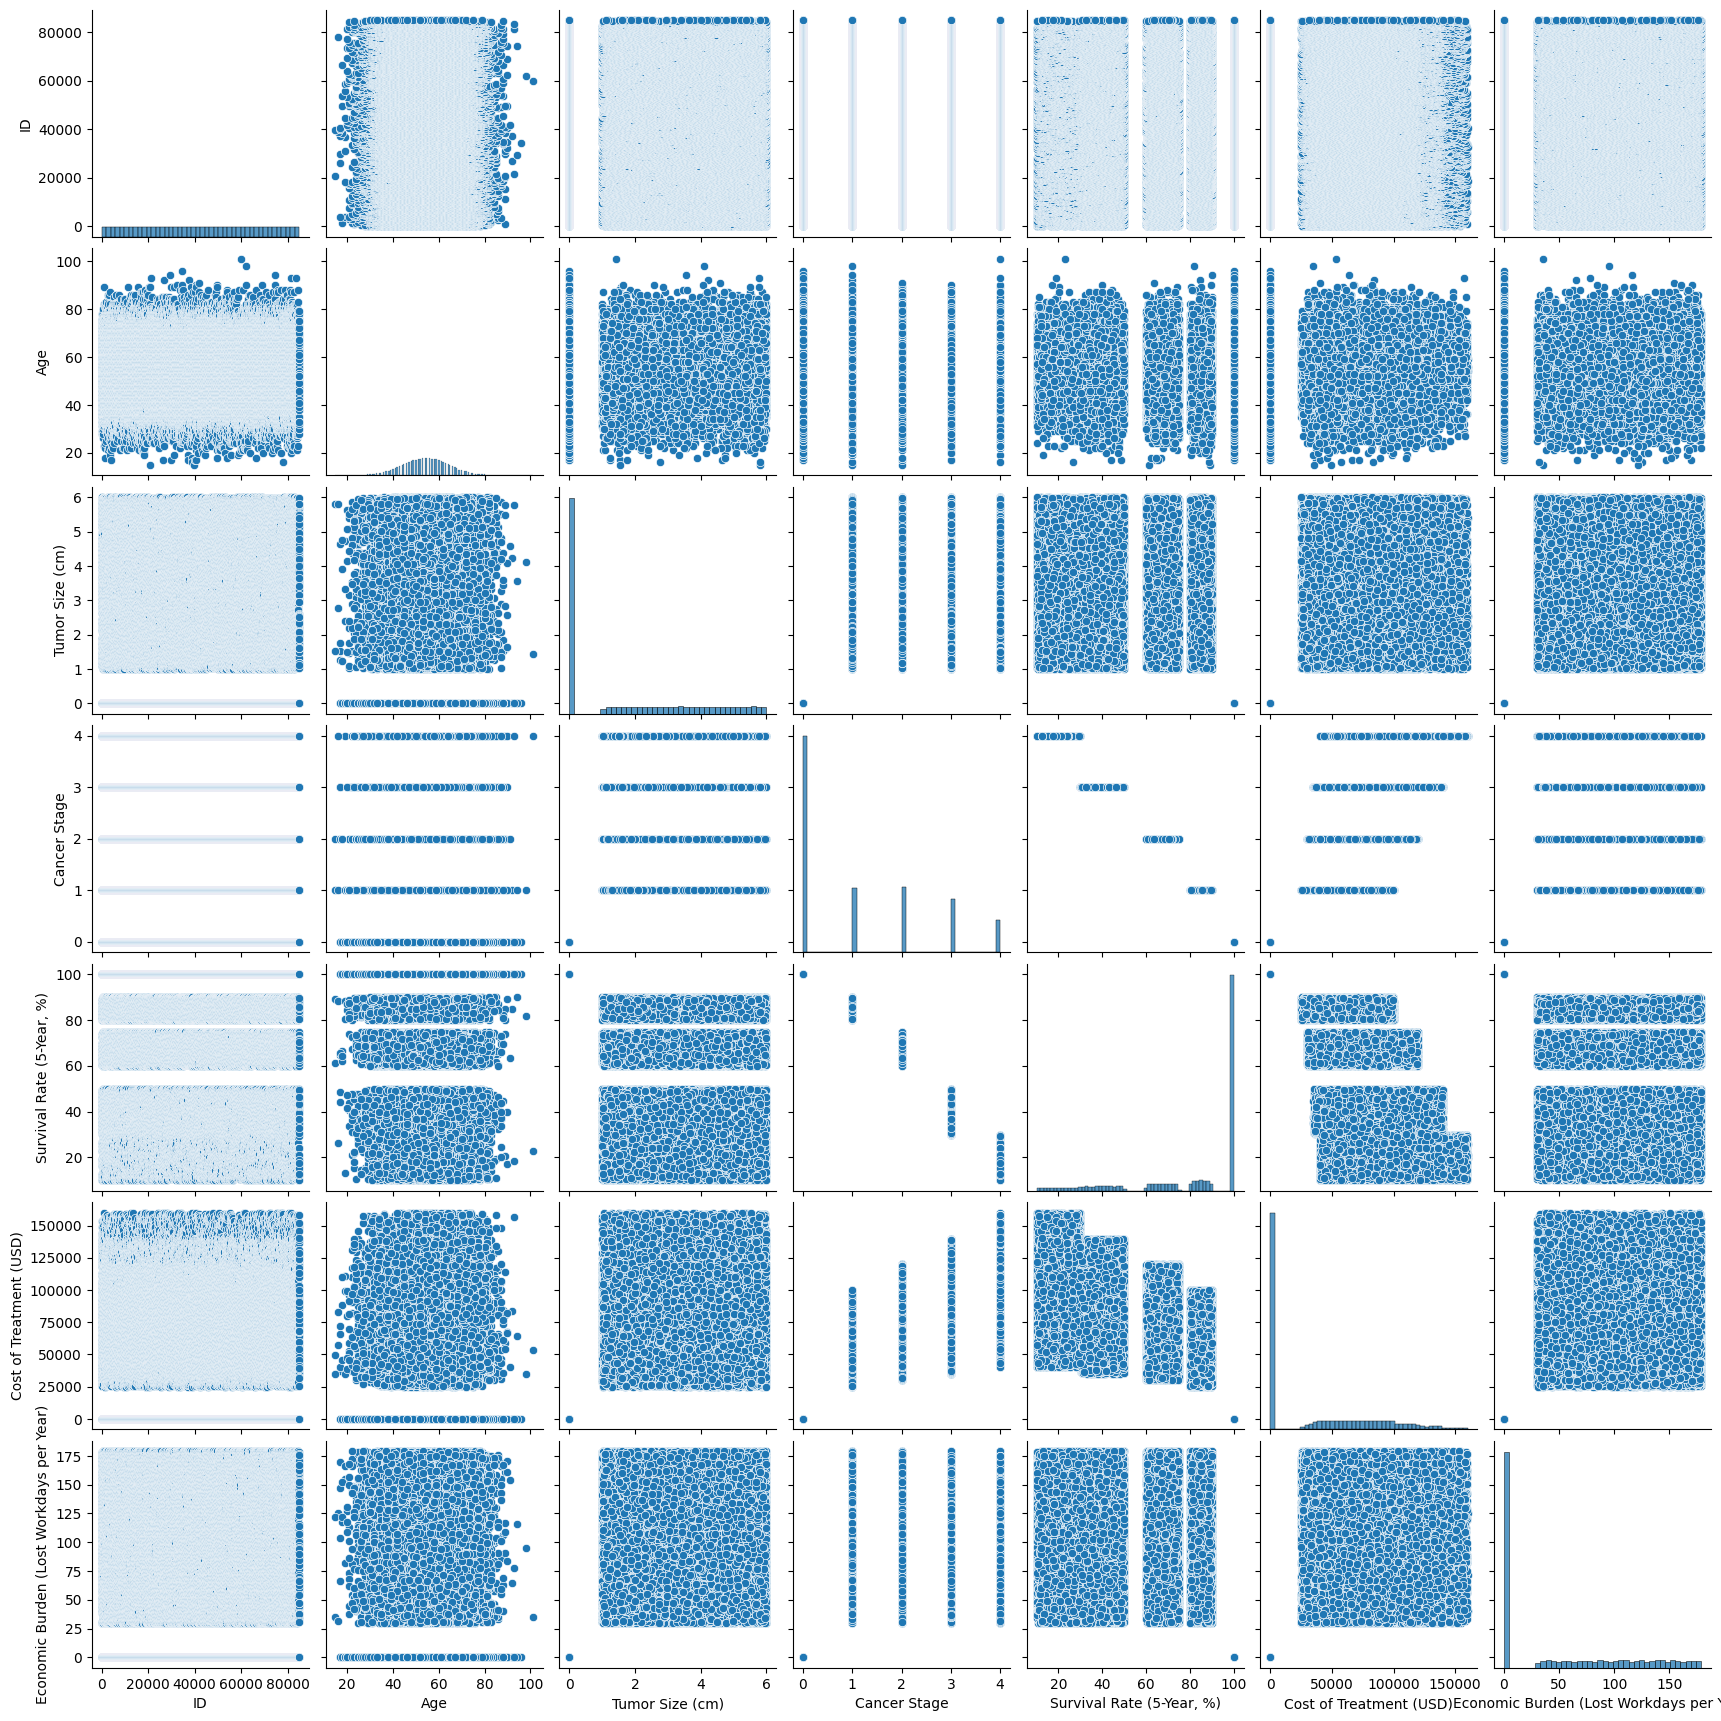

In [13]:
sns.pairplot(df)

**- Exploratory Data Analysis (EDA)**
1. 80,000 + Patients
2. 17 Countries
3. 15 – 101 Patients age
3. Both Gender
4. Cancered and non-cancered patients
5. 4 Cancer stages
6. 6 Tumor size
7. 4 Types of treatment
8. 0 missing data

# Incidence rate

## Which countries are the most affected by cancer?

> **High-risk Populations**  -- **Implication:** reveal regions where oral cancer is disproportionately common, guiding targeted interventions. 

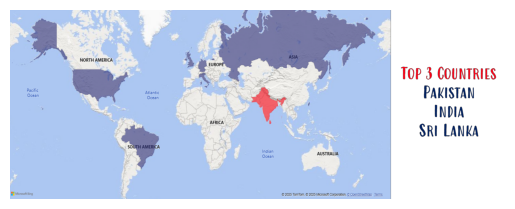

In [7]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/Top 3 Countries.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

## Which gender is the most affected by cancer?

> **1. Biological & Behavioral Risk Factors** -- **Implication:** This reinforces the urgent need for targeted public health campaigns aimed at smoking cessation and alcohol reduction for men.
>
> **2. Public Health Strategy and Screening Programs** -- **Implication:** This finding would argue for gender-specific outreach programs. Encouraging men to visit dentists regularly and be aware of early symptoms (like White or Red Patches in Mouth or Unexplained Bleeding) could save lives through earlier detection.

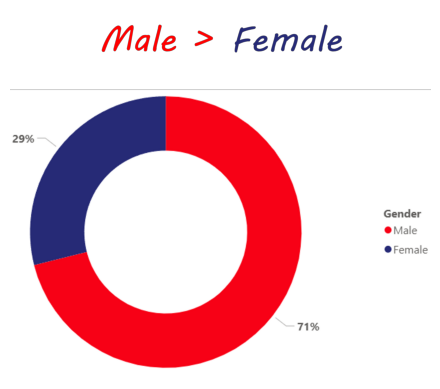

In [8]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/Most affected Gender.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

## Top 5 most affected ages?

> **Public Health Strategy and Screening Programs** -- **Implication:** Target high-risk groups for early detection.

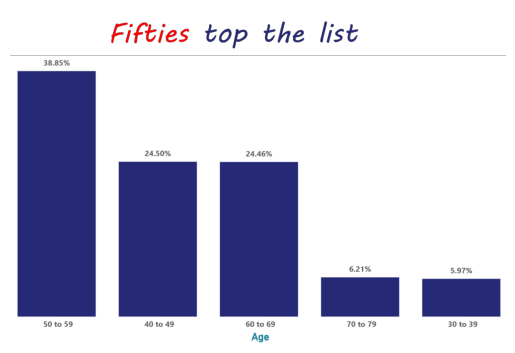

In [9]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/Top 5 affected ages.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

## Does the family cancer history increase the incidence rate?

> **1. Personal Care** -- **Implication:** Reinforces the behavior of the person. It suggests that patients with a family history should be prioritized for intensive smoking cessation and alcohol.
> 
> **2. Public Health Strategy and Screening Programs** -- **Implication:** A patient who reports a Family History of Cancer should be considered high-risk, regardless of whether the cause is genetic or behavioral. Who need more aggressive prevention and earlier screening.


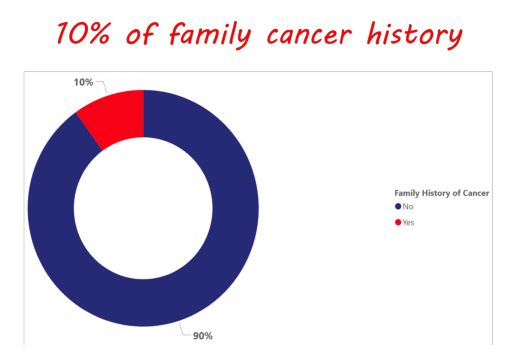

In [22]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/Family Cancer History.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

# Risk Factors

## Is there relation between HPV and oral cancer?

> **1. Confirms that oral cancer is HPV-Driven** -- **Implication:** Linked to sexual transmission (number of oral sexual partners is a risk factor). One of the most important modern discoveries in head and neck oncology.
>
> **2. Prevention and vaccination** -- **Implication:** Vaccination Programs for Both Genders, this is a primary prevention strategy that could drastically reduce the incidence of HPV-driven oral cancers in the future.

### HPV + Oral Cancer Patients Relation

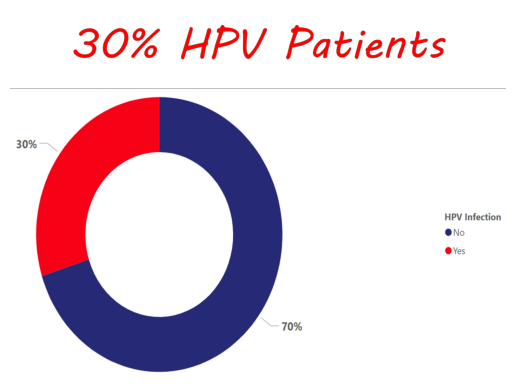

In [6]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/HPV Patients.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

### HPV X Age

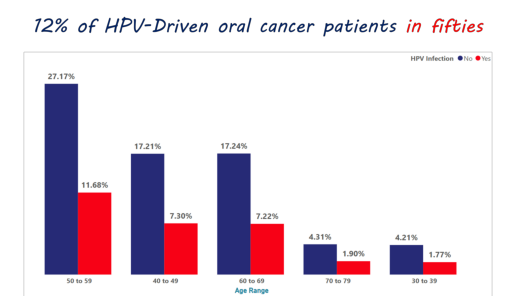

In [10]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/HPV X Age.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

### HPV X Gender

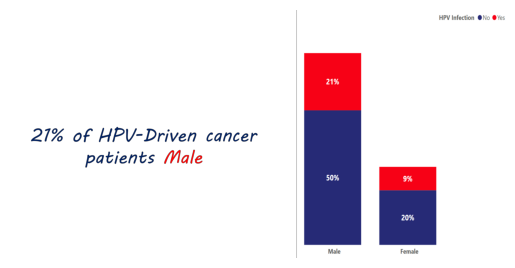

In [11]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/HPV X Gender.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

### HPV X Countries

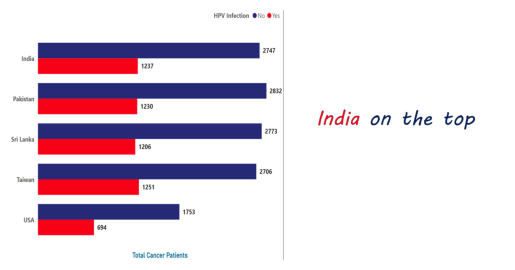

In [12]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/HPV X Countries.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

## Did the habits and daily routine predict the occurrence of the oral cancer?

> **1. Rank the most dangerous habits**
> 
> **2. Public Health Strategy and Screening Programs** -- **Implication:** evidence-based targets for prevention programs.
>
> **3. Regional and cultural risk patterns** -- **Implication:** This allows for culturally tailored public health messages rather than a one-size-fits-all approach.

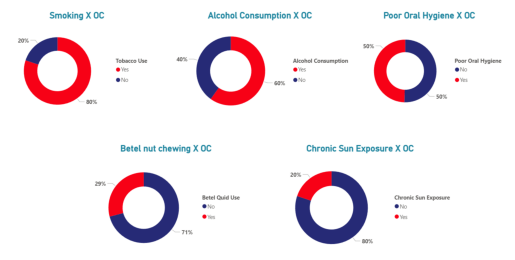

In [23]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/Habits and Daily Routine.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

### Smoking

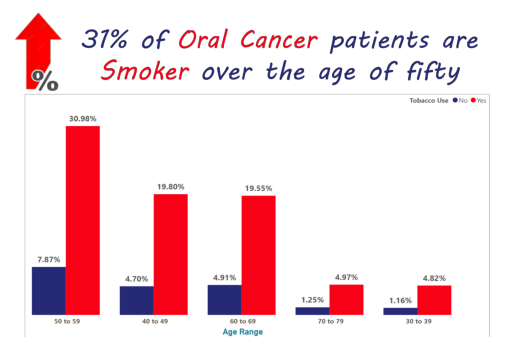

In [14]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/Smoking.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

### Alcoholism

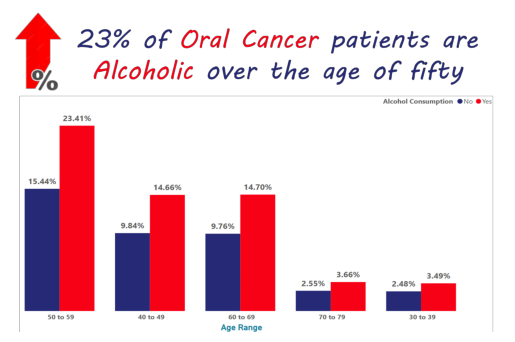

In [15]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/Alcoholism.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

### Combined Risk 

#### A. HPV + Smoker + Alcoholic Patients

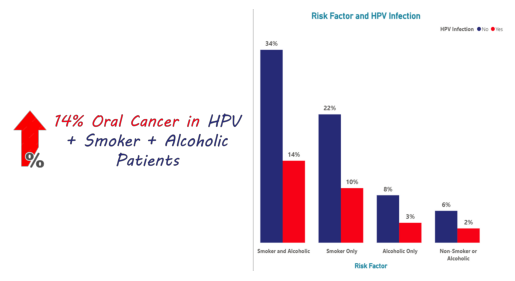

In [16]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/Combined Risk (HPV).png') 
plt.imshow(img)
plt.axis('off')
plt.show()

#### B. Cancer History + Smoker + Alcoholic Patients

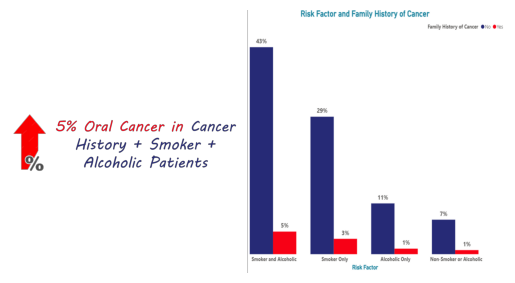

In [17]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/Combined Risk (Cancer History).png') 
plt.imshow(img)
plt.axis('off')
plt.show()

## Did the diet decrease the occurrence of oral cancer?

> **1. Diet as a source of protective compounds** -- **Implication:** This provides a positive, modifiable action people can take to reduce their risk. It's not just about avoiding bad things (tobacco), but also about adding good things (fruits and vegetables).
>
> **2. Public health recommendations** -- **Implication:** provide evidence-based support for public health dietary guidelines.
>
> **3. Economic considerations** -- **Implication:** Could hypothesize that populations with lower socioeconomic status might have both lower fruit/vegetable intake (due to cost and access issues) and higher economic burden from cancer. This highlights a health disparity and argues for policies that improve access to affordable, healthy food.

### Diet + Oral Cancer Patients Relation

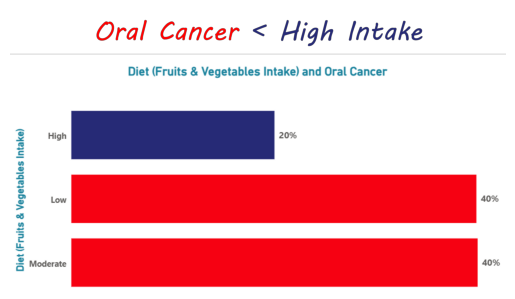

In [19]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/Diet.png') 
plt.imshow(img)
plt.axis('off')
plt.show()

### Diet X Age

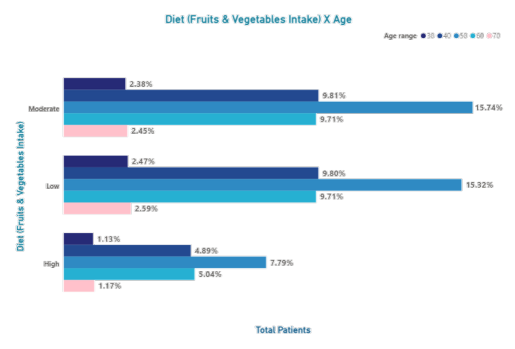

In [21]:
img = mpimg.imread('C:/Users/ASUS/Documents/Capstone project/Analysis Pictures/Diet X Age.png') 
plt.imshow(img)
plt.axis('off')
plt.show()